In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 5s 0us/step


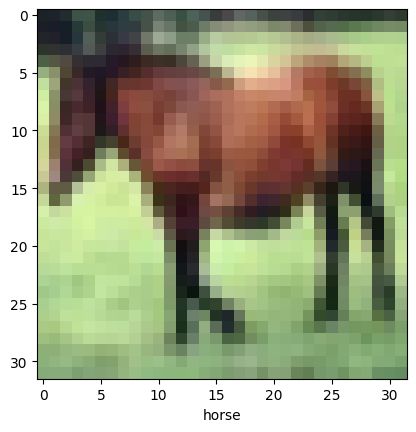

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5236 - accuracy: 0.4439 - val_loss: 1.2400 - val_accuracy: 0.5550
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1683 - accuracy: 0.5843 - val_loss: 1.0923 - val_accuracy: 0.6097
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0243 - accuracy: 0.6410 - val_loss: 1.0617 - val_accuracy: 0.6337
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9283 - accuracy: 0.6737 - val_loss: 0.9855 - val_accuracy: 0.6626
Epoch 5/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.8583 - accuracy: 0.7017 - val_loss: 0.9032 - val_accuracy: 0.6892
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8032 - accuracy: 0.7198 - val_loss: 0.8763 - val_accuracy: 0.7021
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7519 - accuracy: 0.7380 - val_loss: 0.9550 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 5s - loss: 0.9147 - accuracy: 0.7010 - 5s/epoch - 16ms/step
0.7009999752044678
